In [24]:
import numpy as np
import growth_simulations as g
import os
import scipy
import time
import weakref
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [13]:

# # Setting simulation parameters
l = np.array([1.0])
td_std = np.linspace(0.0, 0.1, 5)  # 3
lambda_std = np.linspace(0.0, 0.1, num=2)  # 3
delta = np.array([1.0])
beta = np.linspace(0.025, 0.5, num=20)  # 20
r = beta/(1-beta)
alpha = np.linspace(0.0, 1.0, num=6)  # 11
num_rep = 100  # number of repeats
# # should give 120000 repeats. Run with 2400 job array.
# # should take around 7 hours.4267922. 4325933

par_vals = {'nstep': 900, 'dt': 0.01, 'v_init': 1.0, 'modeltype': 14, 'delta': delta[0], 'lambda': l[0], 'exp_n':4, 'T2':0.0, 'epsilon':0.0}

In [42]:
ind=67
X = [len(td_std), len(lambda_std), len(beta), len(alpha), num_rep]
ind1 = np.unravel_index(ind,X)  # this is the index in the saved array that we must go through
par_vals['td_std'] = 0.0
par_vals['lambda_std']=0.2
par_vals['r']=0.5
par_vals['f']=alpha[ind1[3]]
# running the actual simulation
init_pop = g.starting_popn(par_vals)
par_vals['nstep']=500  # seeding the population with a simulated one
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)
init_pop = g.starting_popn_seeded(c, par_vals)
par_vals['nstep'] = 900  # now we run this simulation for longer with a better seeded population.
c, obs, [temp_vols, temp_vols_G1] = g.discr_time_1(par_vals, init_pop)


In [43]:
par_vals

{'T2': 0.0,
 'delta': 1.0,
 'dt': 0.01,
 'epsilon': 0.0,
 'exp_n': 4,
 'f': 0.0,
 'lambda': 1.0,
 'lambda_std': 0.2,
 'modeltype': 14,
 'nstep': 900,
 'r': 0.5,
 'td_std': 0.0,
 'v_init': 1.0}

In [44]:
i6=1
xv = [obj.vb for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
yv = [obj.vd for obj in c if obj.celltype == i6 and obj.tb>400* par_vals['dt'] * np.log(2)/par_vals['lambda']]
temp = scipy.stats.linregress(xv, yv)

In [45]:
temp

LinregressResult(slope=0.09666910127574298, intercept=0.482963907050466, rvalue=0.6904195433161852, pvalue=0.0, stderr=0.00047976928029097566)

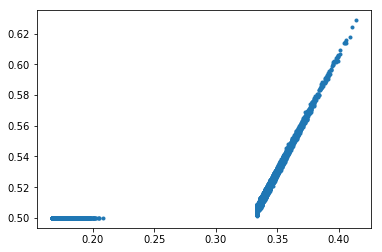

In [46]:
plt.plot(xv,yv, '.')

In [47]:
temp = scipy.stats.linregress(obs[1][400:], np.log(obs[12][400:]))


In [48]:
temp

LinregressResult(slope=0.975545653705156, intercept=3.5257237277824007, rvalue=0.9999965513201543, pvalue=0.0, stderr=0.0001146937852936091)

In [53]:
x=(1-0.5)/1.5

In [54]:
x

0.3333333333333333

In [55]:
def jiseon_model_2(l, beta, sigma_l, alpha):
    num = beta*np.log(2-2*alpha+alpha/beta)**2+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))**2
    denom = beta*np.log(2-2*alpha+alpha/beta)+(1-beta)*(np.log(2-2*alpha+alpha/(1-beta)))
    return l*(1+sigma_l**2/l**2*(-1+0.5*num/denom))

In [58]:
jiseon_model_2(1.0,0.5*(1.0-x), 0.2, 1.0)

0.9760850346579937

In [59]:
jiseon_model_2(1.0,0.3, 0.2, 1.0)

0.9771533043672094